In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/AI_Assignment/Assignment3

/content/drive/MyDrive/AI_Assignment/Assignment3


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

%matplotlib inline

df = pd.read_csv("train.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [7]:
df.shape

(2000, 21)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
X=df.drop(columns=['blue', 'clock_speed', 'n_cores', 'px_height', 'px_width', 'three_g', 'touch_screen'])

In [10]:
X.head()

,battery_power,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,ram,sc_h,sc_w,talk_time,wifi,price_range
0,842,0,1,0,7,0.6,188,2,2549,9,7,19,1,1
1,1021,1,0,1,53,0.7,136,6,2631,17,3,7,0,2
2,563,1,2,1,41,0.9,145,6,2603,11,2,9,0,2
3,615,0,0,0,10,0.8,131,9,2769,16,8,11,0,2
4,1821,0,13,1,44,0.6,141,14,1411,8,2,15,0,1


In [11]:
from sklearn.cluster import KMeans

# Create a KMeans instance
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
final_centroids = kmeans.cluster_centers_

In [12]:
# Display results
print("Final Cluster Assignments:", cluster_assignments)
print("Final Centroids:", final_centroids)

Final Cluster Assignments: [0 0 0 ... 2 1 2]
Final Centroids: [[1.21867103e+03 4.97816594e-01 4.37554585e+00 5.22561863e-01
  3.17117904e+01 5.00873362e-01 1.39082969e+02 1.01004367e+01
  2.21244833e+03 1.22896652e+01 5.84279476e+00 1.11804949e+01
  5.06550218e-01 1.59679767e+00]
 [1.25009078e+03 4.90780142e-01 4.19007092e+00 5.13475177e-01
  3.15219858e+01 5.04113475e-01 1.40805674e+02 9.66099291e+00
  9.07565957e+02 1.23134752e+01 5.60283688e+00 1.08992908e+01
  4.92198582e-01 3.24822695e-01]
 [1.24752632e+03 5.44407895e-01 4.37335526e+00 5.29605263e-01
  3.30328947e+01 5.00000000e-01 1.40921053e+02 1.00049342e+01
  3.43526316e+03 1.23174342e+01 5.87171053e+00 1.09490132e+01
  5.24671053e-01 2.75328947e+00]]


In [13]:
df['Cluster']=cluster_assignments

In [14]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Cluster
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1


In [15]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Cluster
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,1
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,1


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X=X
y=cluster_assignments

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Perceptron model
lr = LogisticRegression(solver='saga', max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [36]:
new_data=[[2000,1,13,1,64,0.6,130,14,3220,16,7,19,1,3]]
pred = lr.predict(new_data)
print(pred)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
# classification report
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep="\n")
    cm_model = confusion_matrix(y_test, predictions)

    # Convert the values in the confusion matrix to strings with formatting
    cm_strings = [[f"{value:0.0f}" for value in row] for row in cm_model]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_model, annot=cm_strings, cmap='Blues', fmt='s', annot_kws={'size': 15}, square=True)
    plt.title('Confusion Matrix for ' + name, size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The accuracy for perceptron is: 84.75 %

The classification report for LogisticRegression Classifier is:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       142
           1       0.95      0.90      0.92       138
           2       0.79      0.91      0.84       120

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



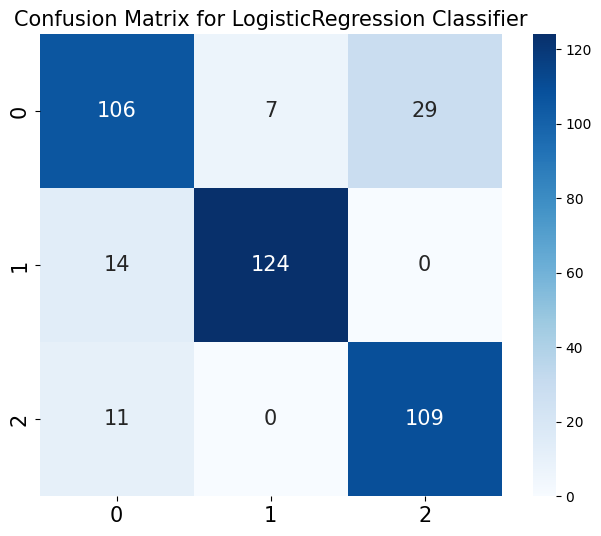

In [40]:
lr = LogisticRegression(solver='saga', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print('The accuracy for perceptron is:', acc_lr * 100, '%')
generate_results(lr, y_pred_lr, 'LogisticRegression Classifier')

In [39]:
# Import Joblib Module from Scikit Learn

import joblib
# Save LR_Model to file in the current working directory

joblib_file = "mobile_model.pkl"
joblib.dump(lr, joblib_file)

['mobile_model.pkl']